In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.plotter import PhononBSPlotter
from pymatgen.phonon.bandstructure import PhononBandStructure
import matplotlib.pyplot as plt
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
import numpy as np

In [2]:
#Obtenir la structure de bandes de phonons
with MPRester("SHhfavYW3jn4MGs2FCQ7cG3TWI4Cgj9y") as m:
    bandphonon = m.get_phonon_bandstructure_by_material_id("mp-7017")

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

# Plot de la dispersion des phonons et zone de Brillouin

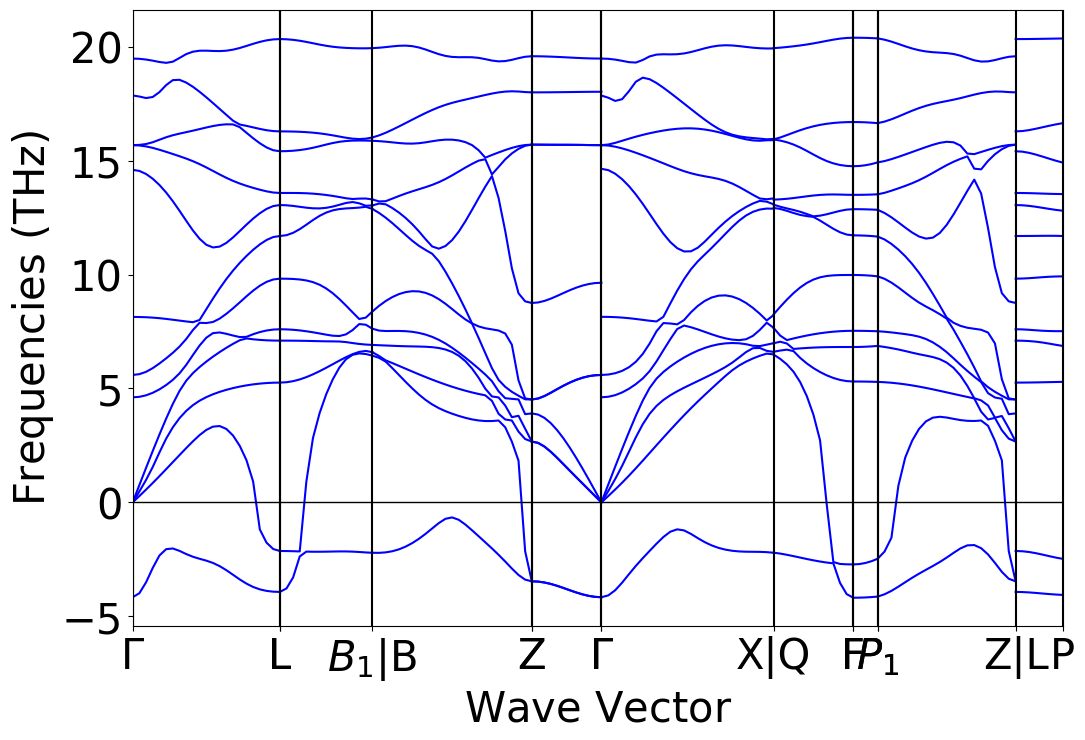

In [3]:
phonon = PhononBSPlotter(bandphonon)

#Plot de la dispersion
phonon.bs_plot_data()
phonon.show()

On peut approximer la vitesse du son grâce à la relation de dispersion du cristal.  

Si la courbe de dispersion est suffisamment linéaire, on peut estimer la vitesse du son comme étant la pente de cette courbe. Cependant, cette approximation est valide uniquement lorsque la longueur d'onde est bien plus grande que la distance interatomique moyenne.  

Par ailleurs, la présence de fréquences négatives dans le diagramme de dispersion indique que ces modes possèdent une fréquence purement imaginaire. Cela signifie que le solide n'est pas dans une phase stable, mais plutôt dans un état instable correspondant à un "saddle point" ou un "hilltop" dans le paysage énergétique de la structure.  

(Source :(https://doi.org/10.1088/2516-1075/ac78b3))


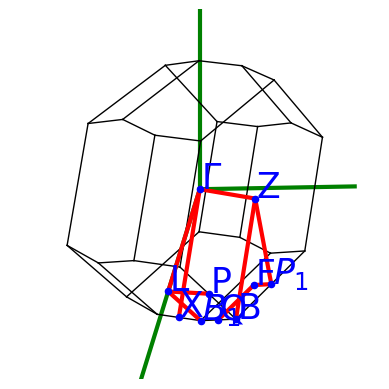

In [4]:
#Zone de Brillouin
phonon.plot_brillouin()

In [5]:
# import itertools
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# # Plotting of the Brillouin zone
# def go_points(points, size=4, color="black", labels=None):
#     mode = "markers" if labels is None else "markers+text"

#     if labels is not None:
#         for il in range(len(labels)):
#             labels[il] = latex_fix(labels[il])

#     import plotly.graph_objects as go
#     return go.Scatter3d(
#         x=[v[0] for v in points],
#         y=[v[1] for v in points],
#         z=[v[2] for v in points],
#         marker=dict(size=size, color=color),
#         mode=mode,
#         text=labels,
#         textfont_color=color,
#         showlegend=False
#     )

# def go_line(v1, v2, color="black", width=2, mode="lines", text=""):
#     import plotly.graph_objects as go
#     return go.Scatter3d(
#         mode=mode,
#         x=[v1[0], v2[0]],
#         y=[v1[1], v2[1]],
#         z=[v1[2], v2[2]],
#         line=dict(color=color),
#         text=text,
#         showlegend=False
#     )

# band = m.get_bandstructure_by_material_id("mp-7017")
# struc = band.structure
# bz_lattice = struc.lattice.reciprocal_lattice
# bz = bz_lattice.get_wigner_seitz_cell()
# fig = go.Figure()

# for iface in range(len(bz)):  # pylint: disable=C0200
#     for line in itertools.combinations(bz[iface], 2):
#         for jface in range(len(bz)):
#             if (iface < jface
#                 and any(np.all(line[0] == x) for x in bz[jface])
#                 and any(np.all(line[1] == x) for x in bz[jface])):
#                 fig.add_trace(go_line(line[0], line[1]))

# fig.update_layout(
#     scene = dict(
#         xaxis = dict(visible=False, range=[-1.15, 1.15]),
#         yaxis = dict(visible=False, range=[-1.15, 1.15]),
#         zaxis = dict(visible=False, range=[-1.15, 1.15]),
#     )
# )
# fig.show()


In [6]:
#plot_brillouin_zone(band.structure)

J'ai essayer d'implementer la zone de Brillouin comme dans le cours, mais du au fait que mon materiau ne possede pas la structure electronique, j'utilise la formule de pytmagene qui n'est pas belle.

nombres de directions: 9
nombres de bandes: 12


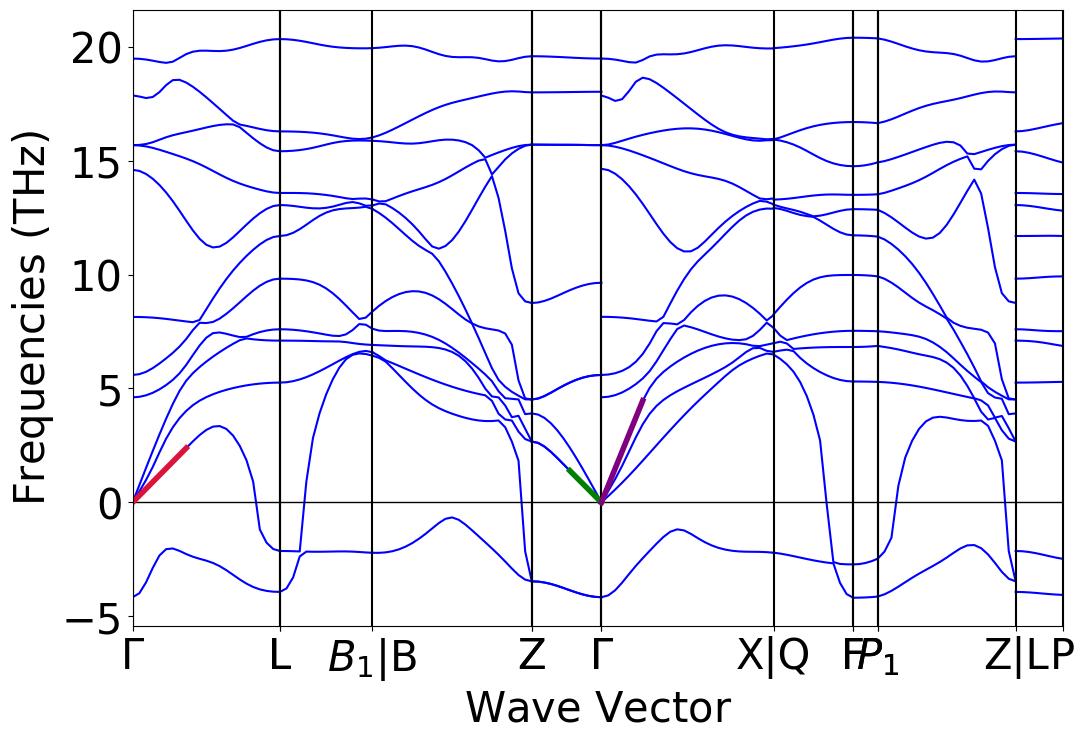

In [7]:
#Choix des directions
data = phonon.bs_plot_data()
distances = data.get('distances')
frequency = data.get('frequency')

print("nombres de directions: "+ str(len(frequency)))
print("nombres de bandes: "+ str(len(frequency[0])))
phonon.get_plot()
plt.plot([distances[0][0],distances[0][8]],[frequency[0][1][0],frequency[0][1][8]], color='crimson', lw = 4)
n=2
plt.plot([distances[4][0],distances[3][6]],[frequency[4][n][0],frequency[3][n][6]], color='green', lw = 4)
n=3
plt.plot([distances[4][0],distances[4][6]],[frequency[4][n][0],frequency[4][n][6]], color='purple', lw = 4)

Direction 1, Bande 1: Γ-L (rouge)

Direction 2, Bande 2: Z-Γ (vert)

Direction 3, Bande 3: Γ-X (mauve)

La **Bande 0** correspond à une bande avec des fréquences purement imaginaires, donc elle n'est pas utilisée.

La **Bande 1** présente des fréquences à la fois réelles et imaginaires, mais la partie linéaire de la direction Γ-L est réelle, donc cette partie est utilisée.

# Calcul de la vitesse du son

On utilise l'approximation de Debye : $\omega = v_s  \mathbf{q} $. Avec $ \mathbf{q}$ la norme ($Å = 10^{-10} m $) et $\omega$ la fréquence (THz = $10^{12}$ Hz).

On aura donc une multiplication par $10^{2}$ car on multiplie la fréquence par la norme.

Pour le calcul de $v_s$, il faudra donc prendre la pente des différentes branches choisies au dessus

In [8]:
data =phonon.bs_plot_data()

facteur = 100

pente1 = np.abs((frequency[0][1][8] - frequency[0][1][0]) / (distances[0][8]-distances[0][0]))#direction gamma-x
pente2 = np.abs((frequency[4][2][0] - frequency[3][2][6]) / (distances[4][0]-distances[3][6]))#direction K-gamma
pente3 = np.abs((frequency[4][3][6] - frequency[4][2][0]) / (distances[4][6]-distances[4][0]))#direction gamma-L

print("Vitesse du son dans la direction Γ-X : " + str(pente1*facteur) + " m/s")
print("\n")
print("Vitesse du son dans la direction K-Γ : " + str(pente2*facteur) + " m/s")
print("\n")
print("Vitesse du son dans la direction Γ-L : " + str(pente3*facteur) + " m/s")

Vitesse du son dans la direction Γ-X : 554.7122289061014 m/s


Vitesse du son dans la direction K-Γ : 548.6281075392583 m/s


Vitesse du son dans la direction Γ-L : 1346.919270935173 m/s


On peut remarquer que la pente mauve est bien plus grande que les autres donc que la vitesse du son est bien plus grande.